<a href="https://www.kaggle.com/code/azminetoushikwasi/ucl-eda-viz-2021-22-players-teams?scriptVersionId=101865096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">UCL ⚽ 2021-22 ⭐ Players and Team Analysis</div>

<h2><center>About UEFA Champions League</center></h2>

<p><center>The UEFA Champions League is an annual club football competition organised by the Union of European Football Associations and contested by top-division European clubs, deciding the competition winners through a round robin group stage to qualify for a double-legged knockout format, and a single leg final.</center></p>

<center><center><img src="https://c.tenor.com/uGJlZtw8MXIAAAAC/uefa-champions-league.gif" alt="UCL" width="1000"/></center>

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Introduction</div>

# <b><span style='color:#4B4B4B'>1. </span><span style='color:#016CC9'>Introduction</span></b>

<p><center>The 2022 UEFA Champions League Final was the final match of the 2021–22 UEFA Champions League, the 67th season of Europe's premier club football tournament organised by UEFA, and the 30th season since it was renamed from the European Champion Clubs' Cup to the UEFA Champions League. It was played at the Stade de France in Saint-Denis, France, on 28 May 2022, between English club Liverpool and Spanish club Real Madrid. It was the third time the two sides have met in the European Cup final, after 1981 and 2018, the third final held here, after the 2000 and 2006 finals, and the first time the same two teams have met in three finals.</center></p>

<p><center>
Real Madrid won the match 1–0 via a 59th-minute goal from Vinícius Júnior for a record-extending 14th title, and their 5th in nine years. As the winners of the 2021–22 UEFA Champions League, Real Madrid earned the right to play against the winners of the 2021–22 UEFA Europa League, Eintracht Frankfurt, in the 2022 UEFA Super Cup. Additionally, the winners typically qualify for the annual FIFA Club World Cup. However, the tournament's status remains uncertain, following FIFA's proposal for a format overhaul.</center></p>

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Dataset Observations</div>

# <b><span style='color:#4B4B4B'>2. </span><span style='color:#016CC9'>Dataset Observations</span></b>

- attacking.csv : All attacking data.
- attempts.csv : All attacking atttempts data.
- defending.csv : All defence and tackle data.
- disciplinary.csv : Fouls, Cards data.
- distributon.csv : Ball distributions and passing data.
- goalkeeping.csv : GK (Save, Punch, concedes) data. 
- goals.csv : Goals data.
- key_stats.csv : Overall states of all players.
- **8 files containing different stats, by player name and clubs names.**

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data, Libraries & Configurations</div>

# <b><span style='color:#4B4B4B'>3. </span><span style='color:#016CC9'>Data, Libraries & Configurations</span></b>

## 3.1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import squarify
from sklearn import manifold

## 3.2. Configurations

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/tweets-during-r-madrid-vs-liverpool-ucl-2018/TweetsChampions.json
/kaggle/input/20212022-football-player-stats/2021-2022 Football Player Stats.csv
/kaggle/input/uefa-champions-league-quarter-finals-since-1980/UCLQuarterFinals.csv
/kaggle/input/ucl-202122-uefa-champions-league/defending.csv
/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv
/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv
/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv
/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv
/kaggle/input/ucl-202122-uefa-champions-league/goals.csv
/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv
/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv
/kaggle/input/uefa-champions-league-players-group-stage-2020/UCL Players.xlsx
/kaggle/input/uefa-champions-league-players-group-stage-2020/UCL Players_csv.csv
/kaggle/input/ucl-statistics/ucl_stats.csv
/kaggle/input/soccer/database.sqlite


## 3.3. Data Loading

In [3]:
ks=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv")
gl=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/goals.csv")
dfn=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/defending.csv")
atkg=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv")
gk=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv")
dsp=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv")
atm=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv")
dis=pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv")

<center><center><img src="https://www.insidesport.in/wp-content/uploads/2021/08/H_UEFA-Champions-League-202122-Group-Stage-Draw-2Thumb.jpg" alt="UCL" width="1000"/></center>

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Key Stats Analysis</div>

# <b><span style='color:#4B4B4B'>4. </span><span style='color:#016CC9'>Key Stats</span></b>

# 4.1. Discriptive Analysis

Let's look at the dataframe first.

In [4]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


We have player name, their club, playing position, minutes - matches played, goals, assists and the distance covered.
Lets look at the stats.

In [5]:
ks.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


We have data of 747 players in total. Average laying time is 331 mins, about 5.5 hours.

In [6]:
ks.describe(include=['object']).T

,count,unique,top,freq
player_name,747,731,Martínez,3
club,747,32,Man. United,31
position,747,4,Midfielder,287
distance_covered,747,514,3.6,5


### Observations: 
- Most of the players are midfielders.

# 4.2. Number of goals scored per club

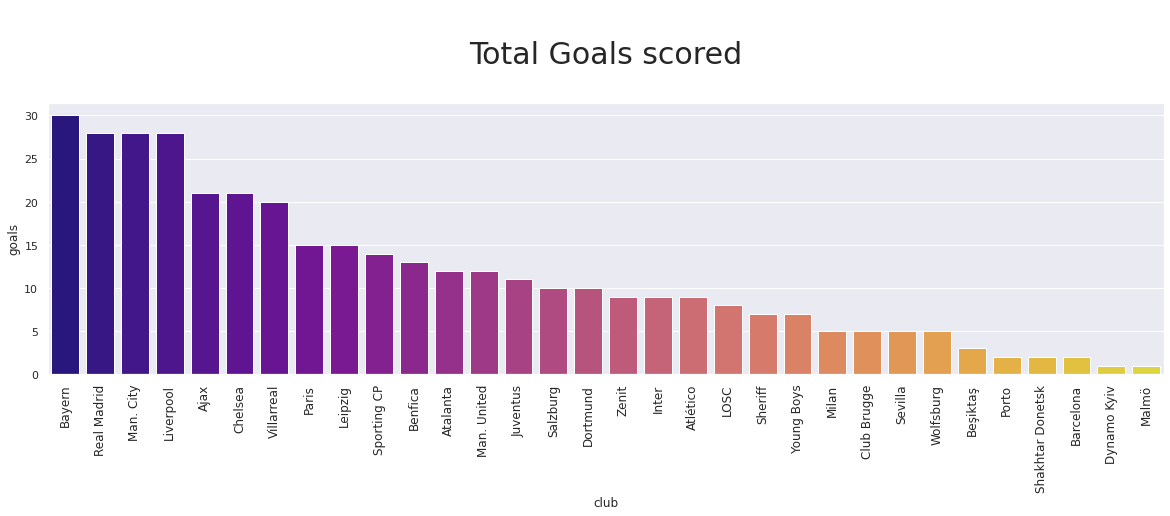

In [7]:
tks=ks.groupby('club',as_index = False)["goals"].sum().sort_values(by='goals',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="goals", data=tks,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Goals scored\n",fontsize=30);

### Observations: 
- Bayern Scored most of the goals. 
- The 2nd is the Champion Read Madrid.
- 3rd Mancheester City was Semi-finalist.

### Number of goals scored per club Treemap

In [8]:
fig = px.treemap(tks, path=['club'],values='goals', width=1200, height=400, title="\nTotal Goals scored per club")
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# 4.3. Average playing time per player per club

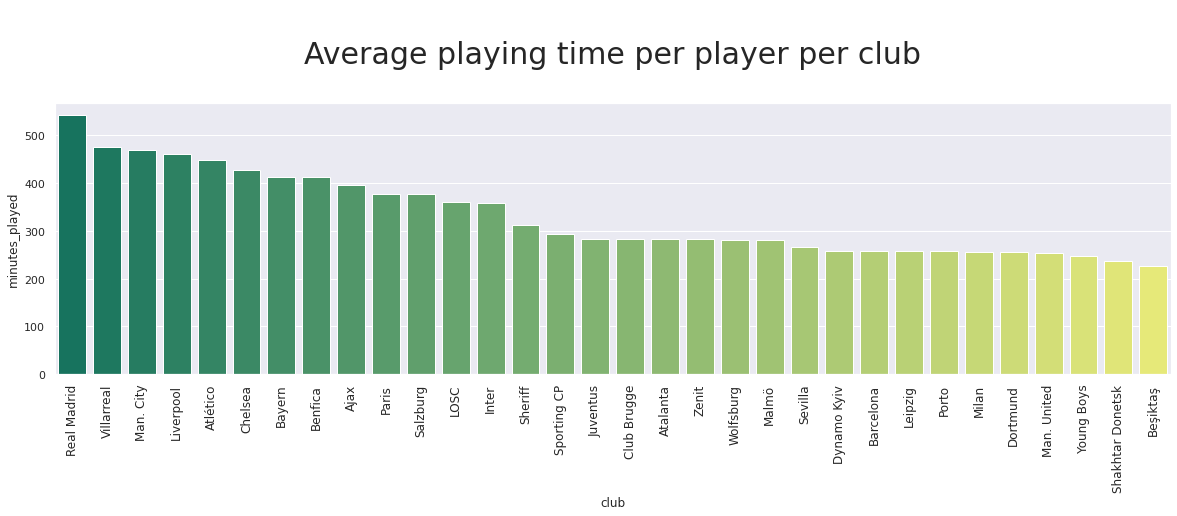

In [9]:
tks=ks.groupby('club',as_index = False)["minutes_played"].mean().sort_values(by='minutes_played',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="minutes_played", data=tks,palette="summer",capsize=.2)
p.axes.set_title("\nAverage playing time per player per club\n",fontsize=30);

### Observations: 
- As RMA is finalist and played 2 extra times, average laying time per player should be higher; but it is substantially higher than another finalistt Liverpool (4th). So, the reason can be - RMA used less players in UCL, so each player player had to player longer than usual.

### Suggestions:
- Playing time pressure should be reduced, and more player should be given place to perform.

# 4.4. Top 10 scorers

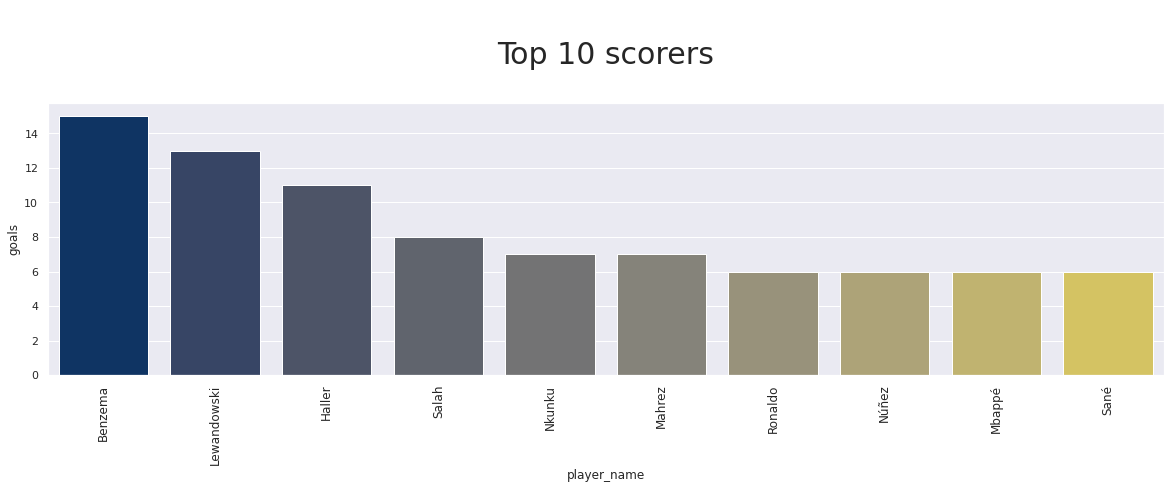

In [10]:
ks=ks.sort_values(by='goals',ascending=False)
tks=ks[:10]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="player_name", y="goals", data=tks,palette="cividis",capsize=2)
p.axes.set_title("\nTop 10 scorers\n",fontsize=30);

### Observations: 
- Benzema from Chamion Real Madrid scoed Highest Number of goals.

### Insights
- Real madrid dominance as a finalist. Other finalist Liverpool is staying behind in all stats.

# 4.5. Unsupervised Testing with TSNE (Goals)

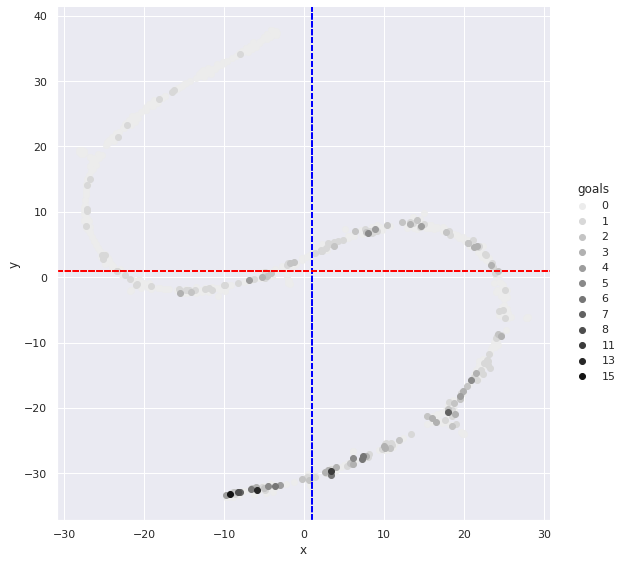

In [11]:
#relacing nulls with 0
ks=ks.replace(to_replace="-", value=0)

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(ks[["minutes_played","match_played","distance_covered"]])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, ks["goals"])),columns=["x",'y',"goals"])
tsne_df.loc[:, "goals"] = tsne_df.goals.astype(int)

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="goals", size=8,palette='binary')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["goals"].quantile(0.9), color='blue')
grid.refline(y=tsne_df["goals"].quantile(0.9), color='red');

### Insights
- Goals per matches played, minutes played and distance covered plays a nice relation with goals!!

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Goals Analysis</div>

# 5. Goals Analysis

A goal is scored when the whole of the ball passes over the goal line, between the goalposts and under the crossbar, provided that no offence has been committed by the team scoring the goal.
"Goal" is most typical, but "net" is occasionally used as well. "Scored a goal" (or "scored"). Three in one game is a "hat trick". Occasionally for two in a game I've heard Brits say "scored a brace".

# 5.1. Top 15 Teams in terms of goals

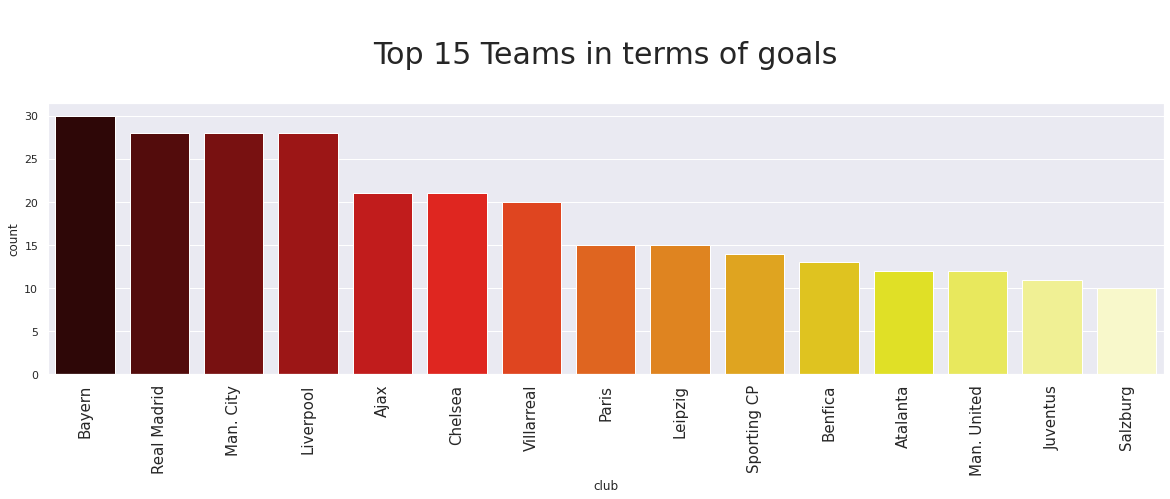

In [12]:
g1=ks.groupby('club')['goals'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of goals\n",fontsize=30);

### Observations: 
- Bayern leads the list; followed by two fnalists. 

# 5.2. Goal types analysis (How scored)

In [13]:
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["right_foot","left_foot","headers","others"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title=' Goal types analysis (How scored)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Observations: 
- Almost half of he goals are scored by right foot.
- the other half is almost 2/3 left foot and /3 headers.

# 5.3. Goal types analysis (From where scored)

In [14]:
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["inside_area","outside_areas","penalties"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Goal types analysis (From where scored)')
fig.show()

### Observations: 
- Most goals are scored from inside the box.
- Outside of and penalties are about same.

# 5.4. Goal types analysis (Player position)

Text(0.5, 1.0, '\nGoals per playing position\n')

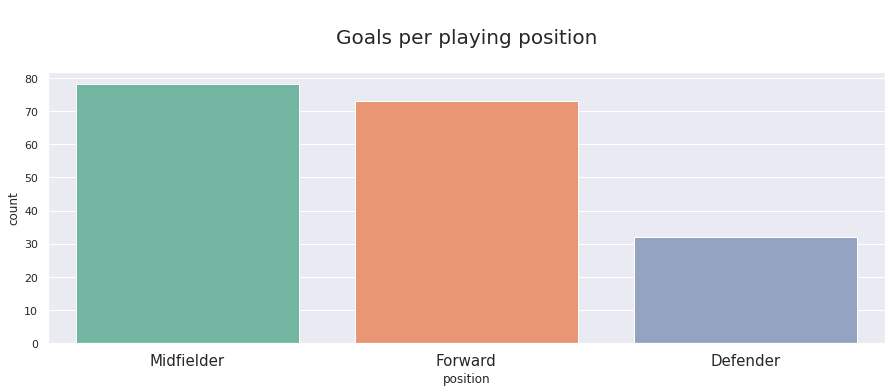

In [15]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(gl['position'],hue_order=gl.groupby('position'),order=gl.position.value_counts().sort_values(ascending=False).index,palette="Set2")
p.axes.set_title("\nGoals per playing position\n",fontsize=20)

### Insights
- Midfielders scored more goals then forwards!!!!

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Attacking Analysis</div>

# 6. Attacking Analysis

Attacking is the term used to describe the movement of the team in possession of the ball. It is not simply the act of shooting on goal or the play of the team in front of the net; it is more complex than that; it is the movement of the players and the ball for the team who has possession.
The five attacking principles are: Dispersal, Penetration, Movement, Support & Innovation/Creativity.
1. Typical Primary Style Methods
2. Pushing up from the front (attacking depth)
3. Sitting deep at the back (attacking depth)
4. Wide positioning (attacking width)
5. High tempo play.

## 6.1. Top 15 dribblers

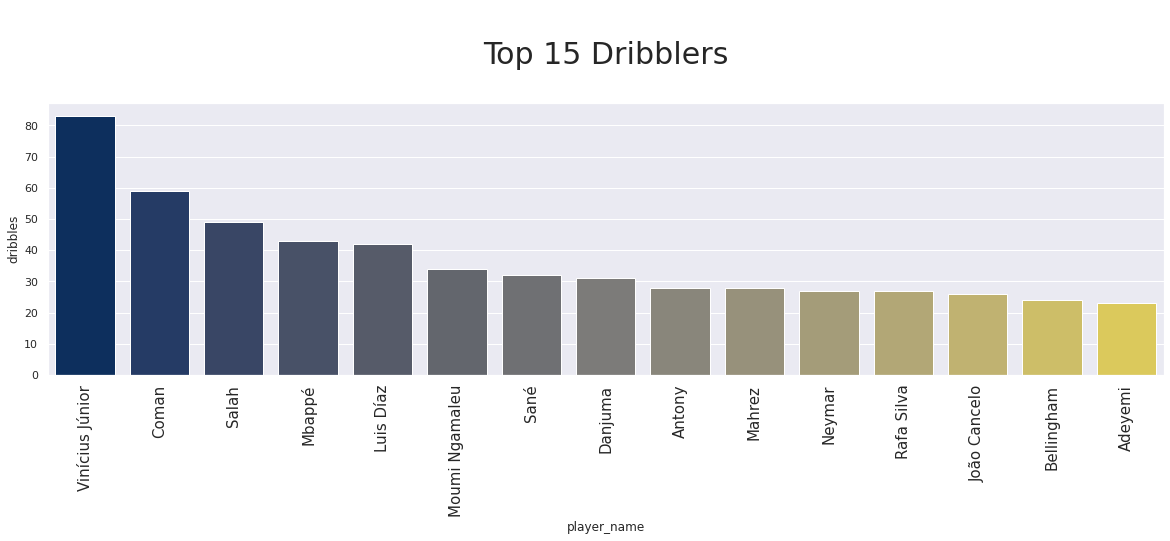

In [16]:
atkg=atkg.sort_values(by='dribbles',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="dribbles", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Dribblers\n",fontsize=30);

### Observations: 
- Vini from RMA leads th list.

# 6.2. Team Dribbles

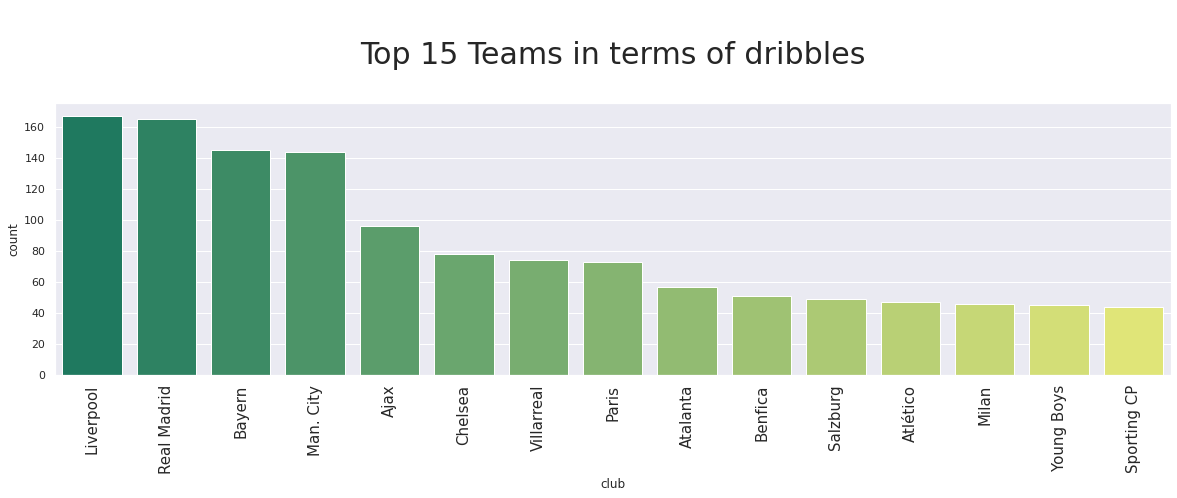

In [17]:
g1=atkg.groupby('club')['dribbles'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="summer",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of dribbles\n",fontsize=30);

### Observations: 
- Finalists leads the chart of d=most dribbles by team.

# 6.3. Top 15 Corner Takers

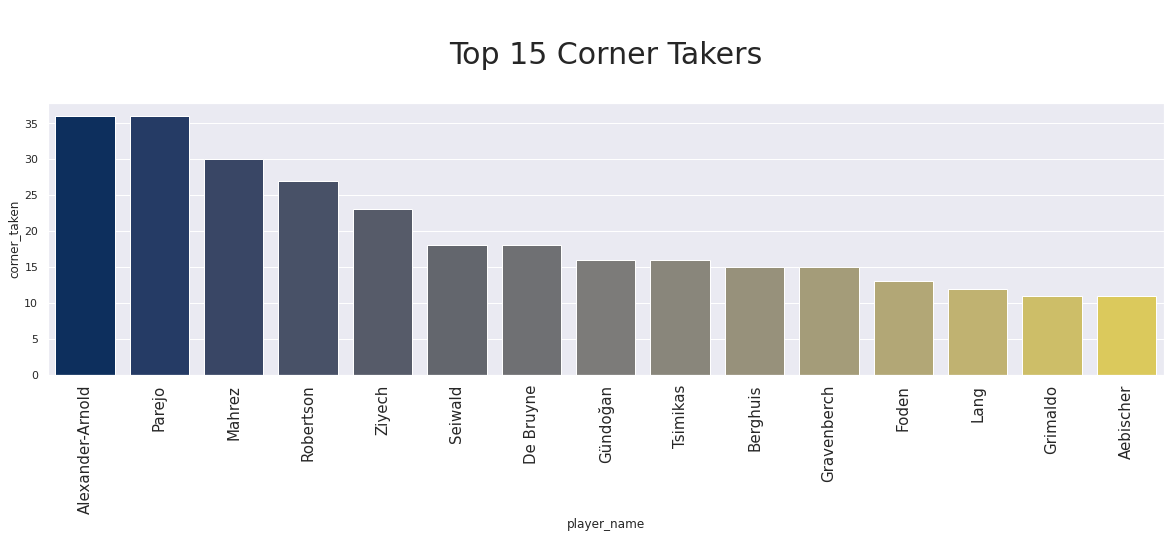

In [18]:
atkg=atkg.sort_values(by='corner_taken',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="corner_taken", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Corner Takers\n",fontsize=30);

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Defense Analysis</div>

# 7. Defence Analysis

A player who normally operates nearer to his own goal, rather than in the opposing half, with the main intention of stopping the opposition from scoring.
To improve defending in football you need to train 3 times a week doing exercises that work on 4 aspects of your defending game: positioning, tackling, heading, and passing. Also, this training has to be done with a team with game-like situations as well as by yourself.
There are three basic levels to a defensive formation: the line, linebackers and the secondary. Variations to defensive formations come in the number and combinations of players at each of these levels. Traditionally, defensive formations are named according to the number of down linemen and linebackers.

# 7.1. Ball recovery analysis by laying position

In [19]:
g1=dfn.groupby('position')['balls_recoverd'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(10,10)})
fig = px.pie(g1, values="count", names=g1.position, title='Ball recovery analysis')
fig.show()

### Observations: 
- Defenders are doing well, but forwards are also contributng in recovering balls now-a-days.

# 7.2. Tackles won / loss ratio

In [20]:
gl_sum = pd.DataFrame(dfn.sum(numeric_only = True),).T[["t_won","t_lost"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Tackle WON vs LOST',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

### Observations: 
- Most of the tackles are lost. Not quality defending.

# 7.3. Clearence per club

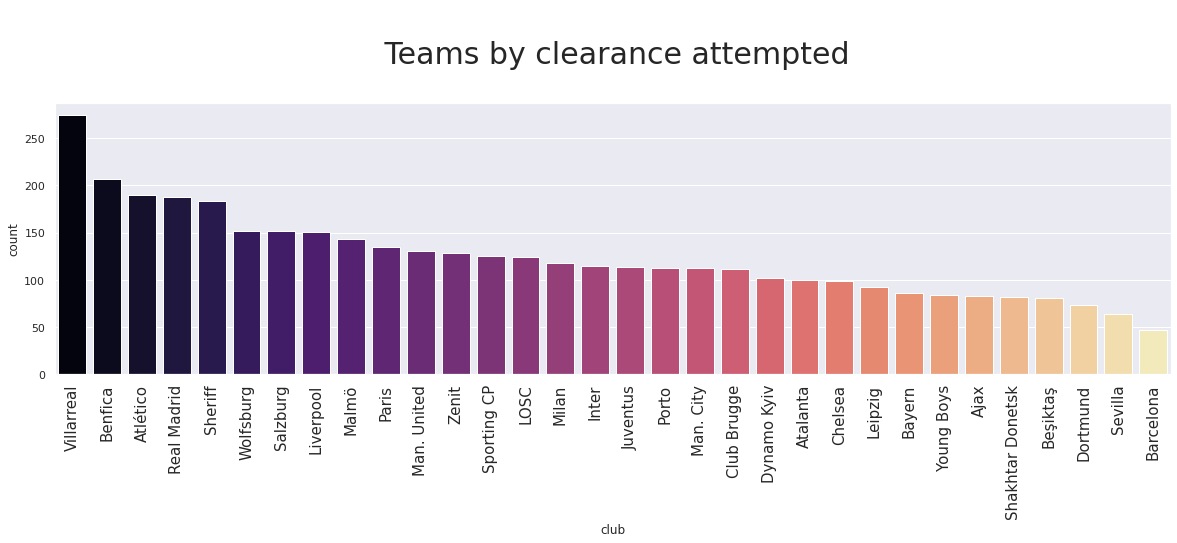

In [21]:
g1=dfn.groupby('club')['clearance_attempted'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="magma",capsize=2)
p.axes.set_title("\n Teams by clearance attempted\n",fontsize=30);

### Observations: 
- Vhilareal leads the list atttempting most clearences by a great extend.

# 7.4. Club with successful tackles

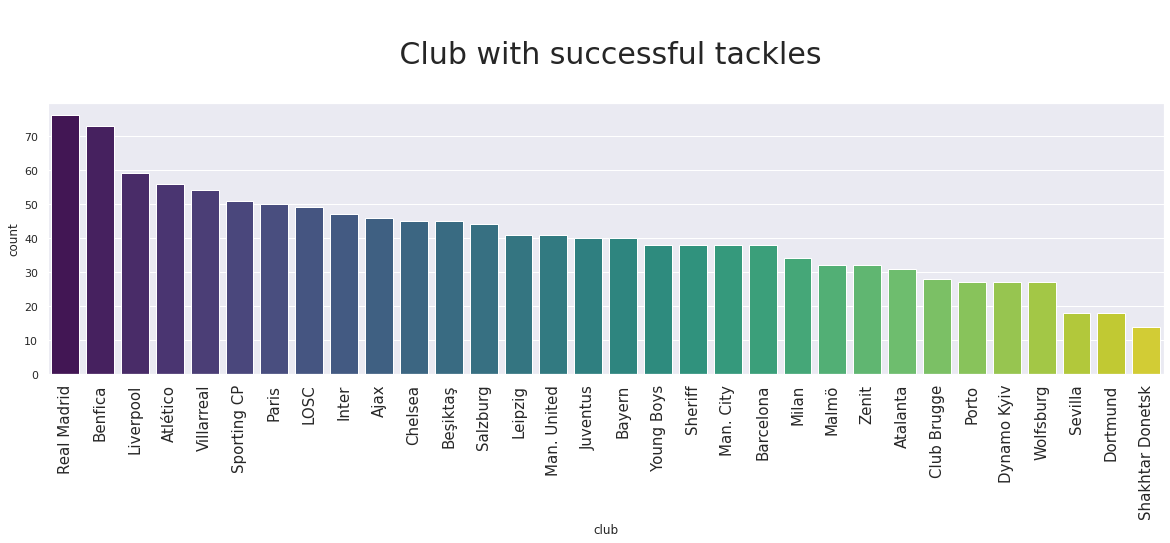

In [22]:
g1=dfn.groupby('club')['t_won'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club with successful tackles\n",fontsize=30);

### Observations: 
- Real Madrid is leading the list with most successful defense.

# 7.5. Top 15 defender by ranking

### Ranking system:
 - (tackle by defender/highest tackles)* 0.3 + 
 - (balls_recoverd by defender/highest balls_recoverd)* 0.3 +
 - (tackle won  by defender/highest tackles won )* 0.2 +
 - (tackle won  by defender/ tackles attempted )* 0.1 +
 - (clearence attempted  by defender/highest clearence attempted )* 0.1

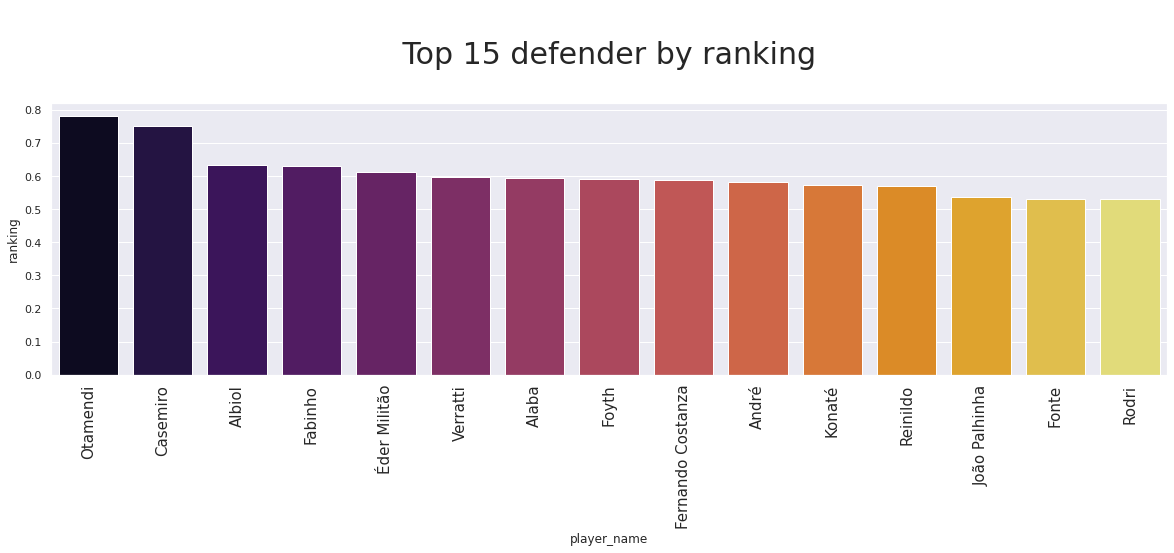

In [23]:
dfn['ranking']=(dfn['balls_recoverd']/dfn['balls_recoverd'].max())*0.3+(dfn['tackles']/dfn['tackles'].max())*0.3+(dfn['t_won']/dfn['tackles'])*0.2+(dfn['t_won']/dfn['t_won'].max())*0.1+(dfn['clearance_attempted']/dfn['clearance_attempted'].max())*0.1
dfnx=dfn.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 defender by ranking \n",fontsize=30);

### Observations: 
- RMA defenders are leading.

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Attacking Attempts Analysis</div>

# 8. Attacking Attempts Analysis

# 8.1. Attacking Attempts Analysis - Success rate

In [24]:
gl_sum = pd.DataFrame(atm.sum(numeric_only = True),).T[["on_target","off_target","blocked"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Attacking Attempts Analysis - Success rate : on_target vs off_target vs blockedT',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

### Observations: 
- The ratios are quite same. Shoots on target - off target - saves.

# 8.2. Club ranking by total attacking attempts

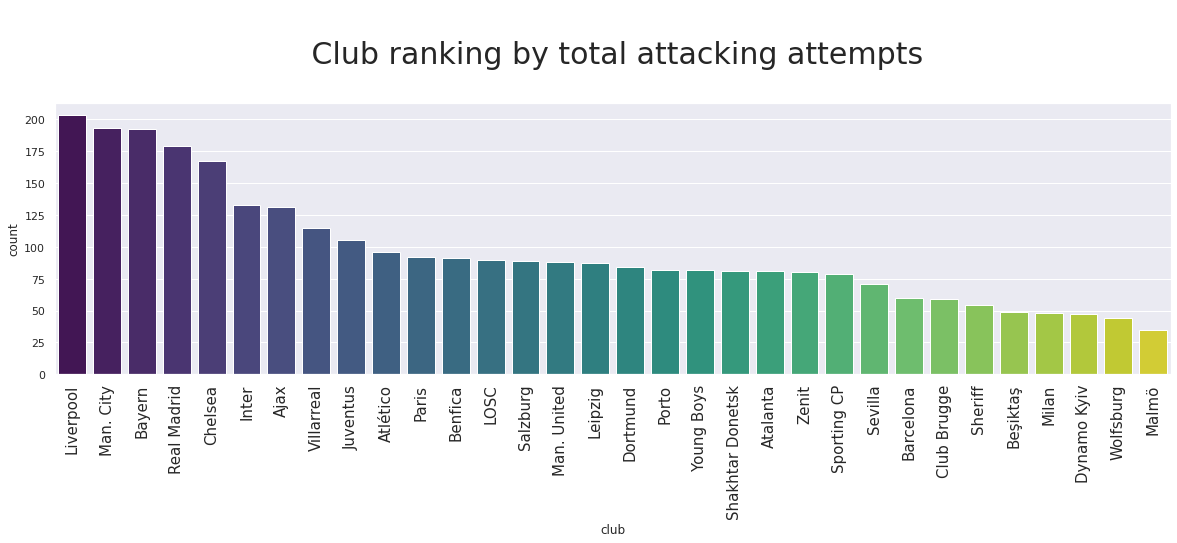

In [25]:
g1=atm.groupby('club')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by total attacking attempts\n",fontsize=30);

### Observations: 
- Two english clubs are leading , following by German and Spain champpions.

# 8.3. Player Position ranking by total attacking attempts

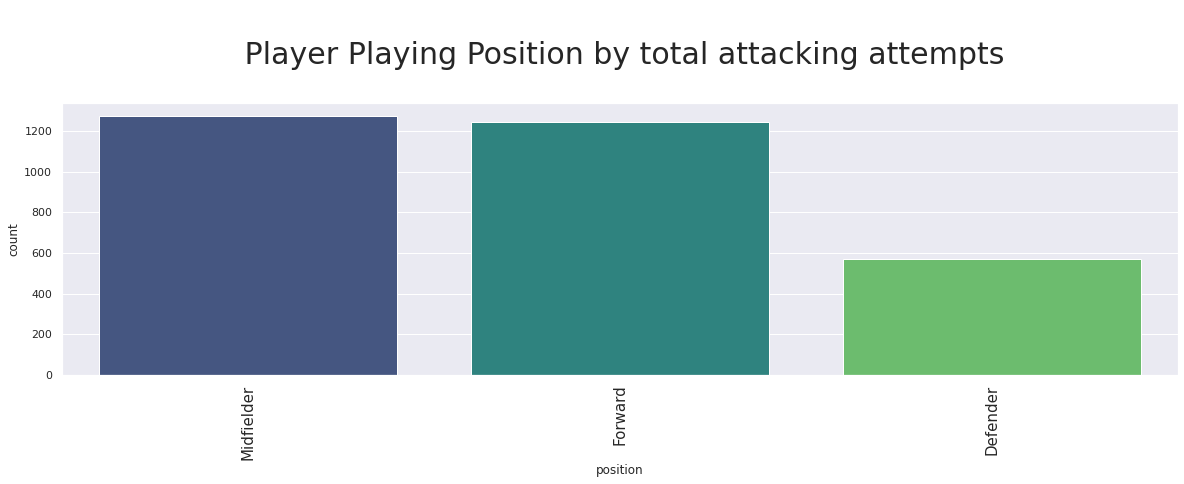

In [26]:
g1=atm.groupby('position')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="position", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Player Playing Position by total attacking attempts\n",fontsize=30);

### Observations: 
- Midfielders and Forwards are contributing equally in attacking.

# 8.4.  Top 15 attacker by ranking on attacking atttempts

### Ranking system:
 - (total_attempts/highest total_attempts)* 0.5 + 
 - (on_target/highest on_target)* 0.3 +
 - (on_target/total_attempts )* 0.4 -
 - (off_target/total_attempts)* 0.2

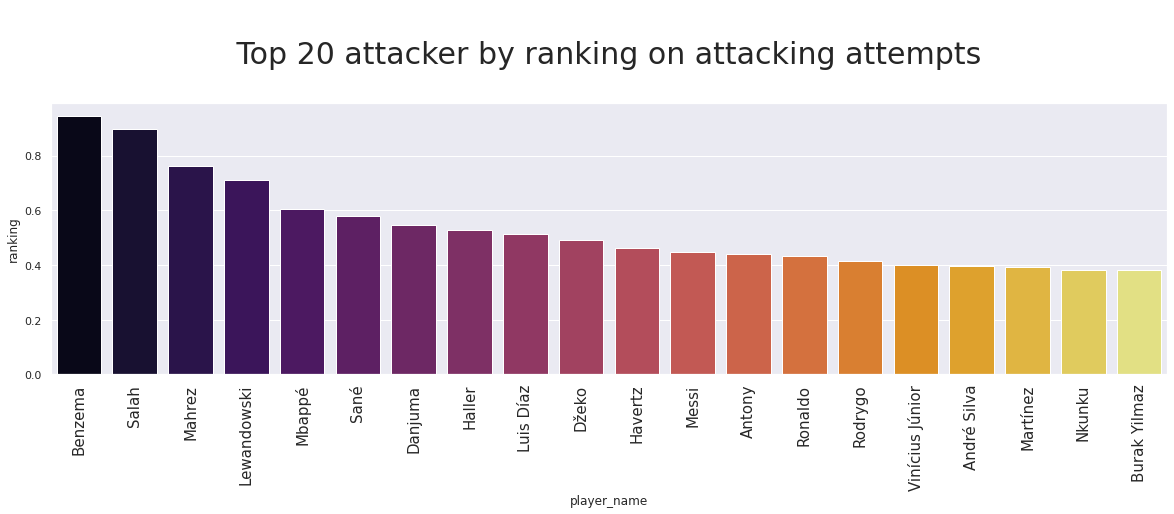

In [27]:
atm['ranking']=(atm['total_attempts']/atm['total_attempts'].max())*0.5+(atm['on_target']/atm['on_target'].max())*0.3+(atm['on_target']/atm['total_attempts'].max())*0.4-(atm['off_target']/atm['total_attempts'])*0.2
dfnx=atm.sort_values('ranking',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 20 attacker by ranking on attacking attempts \n",fontsize=30);

### Observations: 
- Ballon d'Or deserver Benzera leads the list, followed by Salah - another contester.

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Goal Keper Performance Analysis</div>

# 9. Goal Keeper Performance Analysis

# 9.1.  Overall GK Performances

In [28]:
gl_sum = pd.DataFrame(gk.sum(numeric_only = True),).T[["saved","conceded"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Overall GK Performance',color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

### Observations: 
- GKs saved twice more than received in overall. Thats impressive.

# 9.2. Club ranking by GK Saves

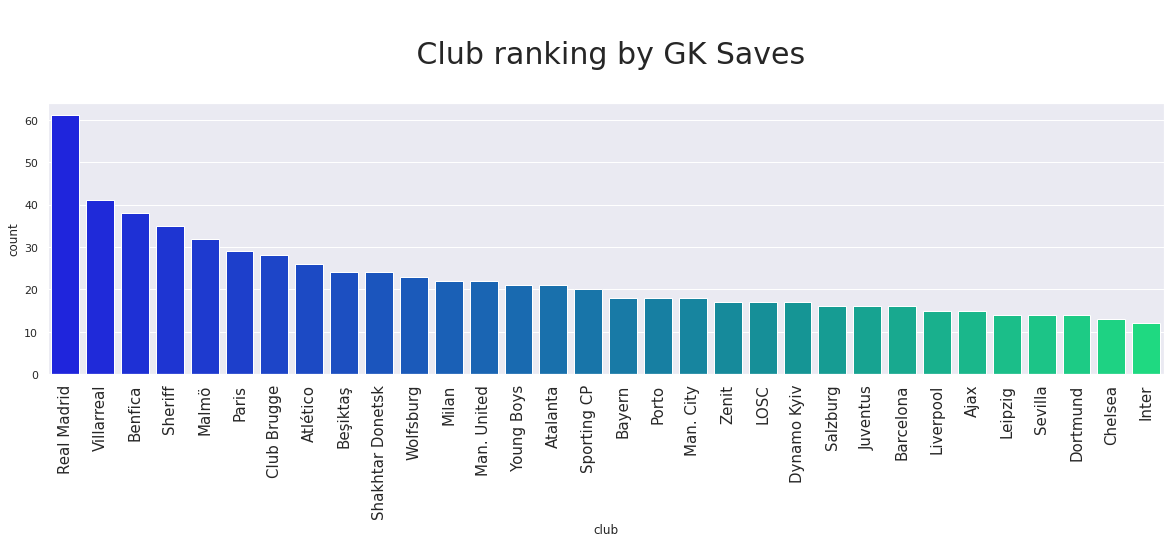

In [29]:
g1=gk.groupby('club')['saved'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="winter",capsize=2)
p.axes.set_title("\n Club ranking by GK Saves\n",fontsize=30);

### Observations: 
- Real Madrid's GK is leading the list to a great extend.

# 9.3. Club ranking by Cleansheets

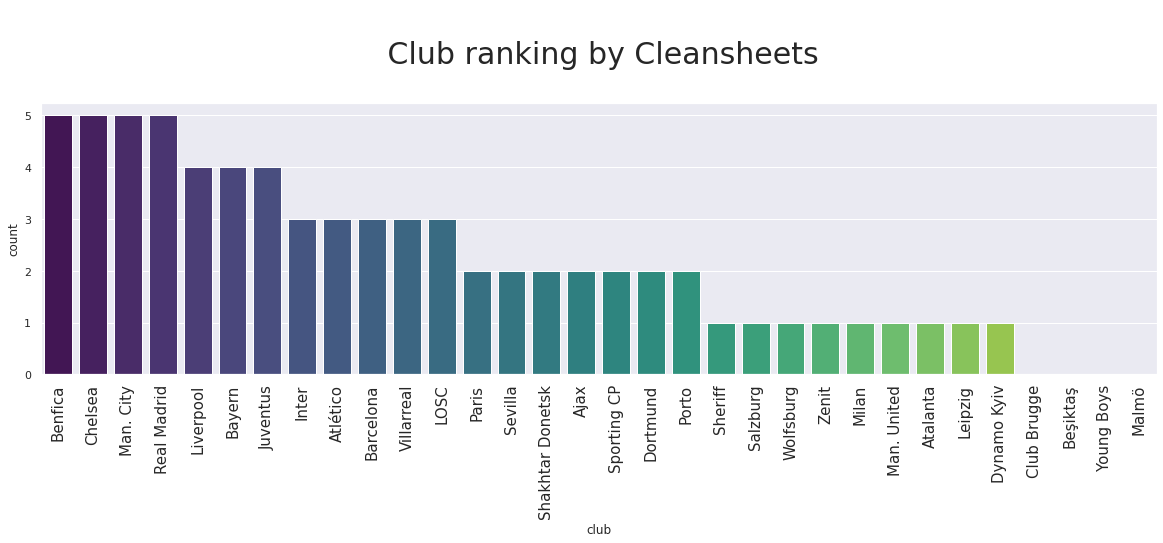

In [30]:
g1=gk.groupby('club')['cleansheets'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by Cleansheets\n",fontsize=30);

# 9.4.  Top 15 GK by ranking

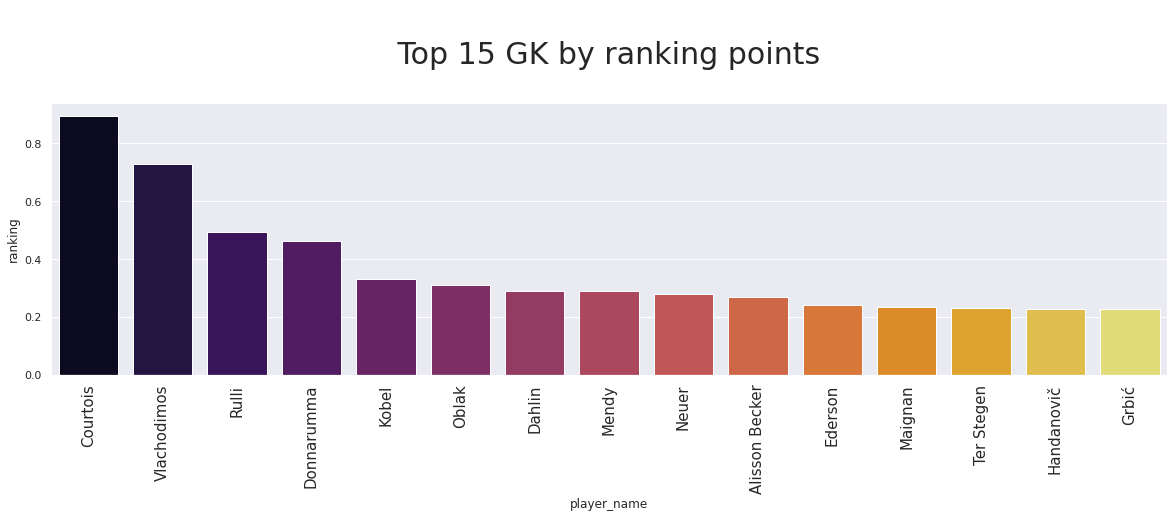

In [31]:
gk['ranking']=(gk['saved']/gk['saved'].max())*0.4-(gk['conceded']/(gk['conceded']+gk['saved']))*0.2+(gk['saved_penalties']/gk['saved_penalties'].max())*0.2+(gk['cleansheets']/gk['cleansheets'].max())*0.3+(gk['punches made']/gk['punches made'].max())*0.1
    
    
dfnx=gk.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 GK by ranking points \n",fontsize=30);

### Observations: 
- Man of the final is goalkeeer of the tournament.

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Ball Distribution Analysis</div>

# 10. Ball Distribution Analysis

# 10.1.  Top 20 Players in terms of Ball Distribution

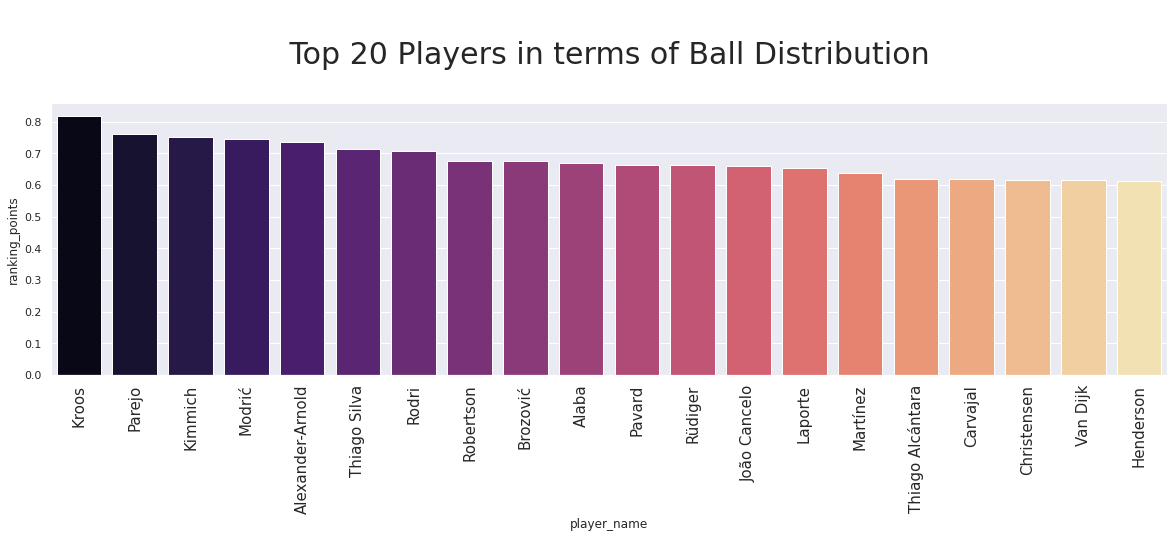

In [32]:
dis['ranking_points']=(dis['pass_attempted']/dis['pass_attempted'].max())*0.2 +(dis['pass_completed']/dis['pass_completed'].max())*0.2 +(dis['pass_accuracy']/100)*0.3 +(dis['cross_attempted']/dis['cross_attempted'].max())*0.1 +(dis['freekicks_taken']/dis['freekicks_taken'].max())*0.1 +(dis['cross_accuracy']/100)*0.1 
    
dfnx=dis.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="magma",capsize=2)
p.axes.set_title("\n Top 20 Players in terms of Ball Distribution \n",fontsize=30);

### Observations: 
- RMA dynamic Duo Kroos - Modrc leads.

# 10.2. Team Ranking based on Distribution

In [33]:
g1=dis.groupby('club')["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"].agg('sum').reset_index()

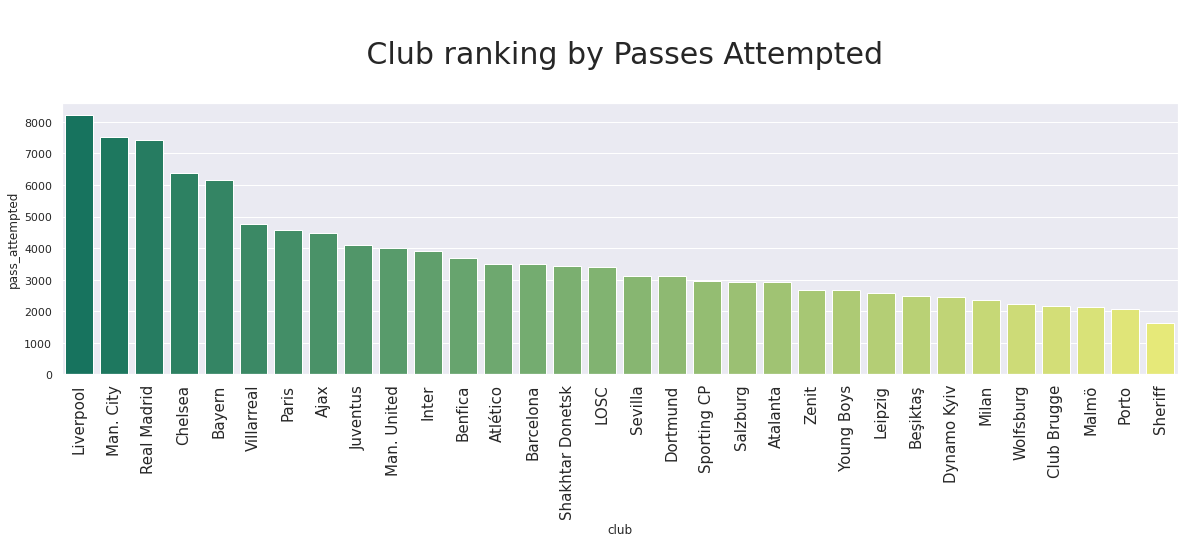

In [34]:
g1=g1.sort_values('pass_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="pass_attempted", data=g1,palette="summer",capsize=2)
p.axes.set_title("\n Club ranking by Passes Attempted\n",fontsize=30);

### Observations: 
- RMA and the teams RMA defeated on the way to the victory. ;p

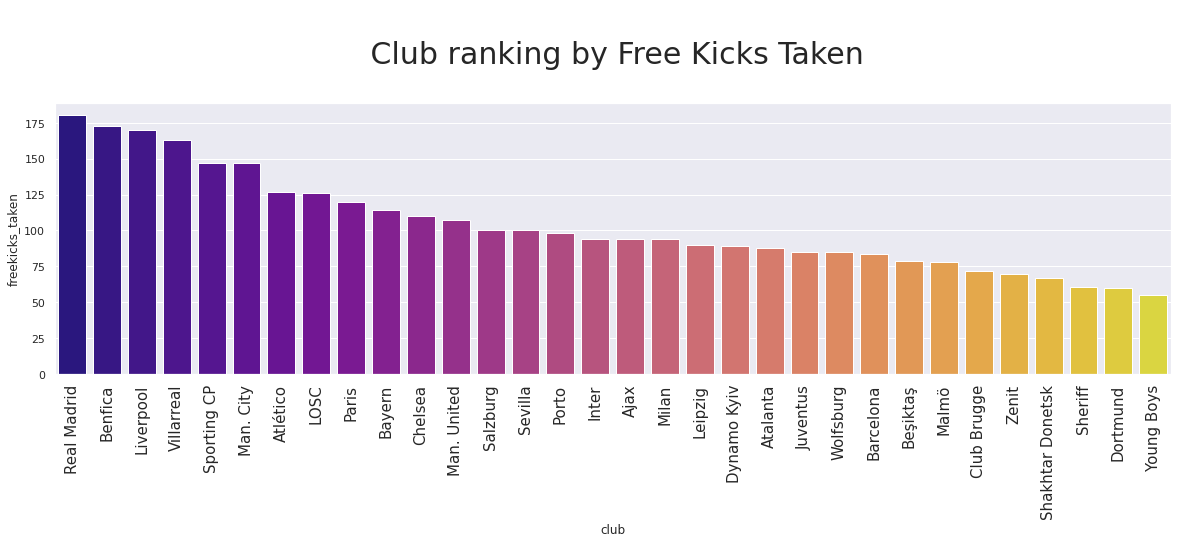

In [35]:
g1=g1.sort_values('freekicks_taken',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="freekicks_taken", data=g1,palette="plasma",capsize=2)
p.axes.set_title("\n Club ranking by Free Kicks Taken\n",fontsize=30);

### Observations: 
- RMA leads.

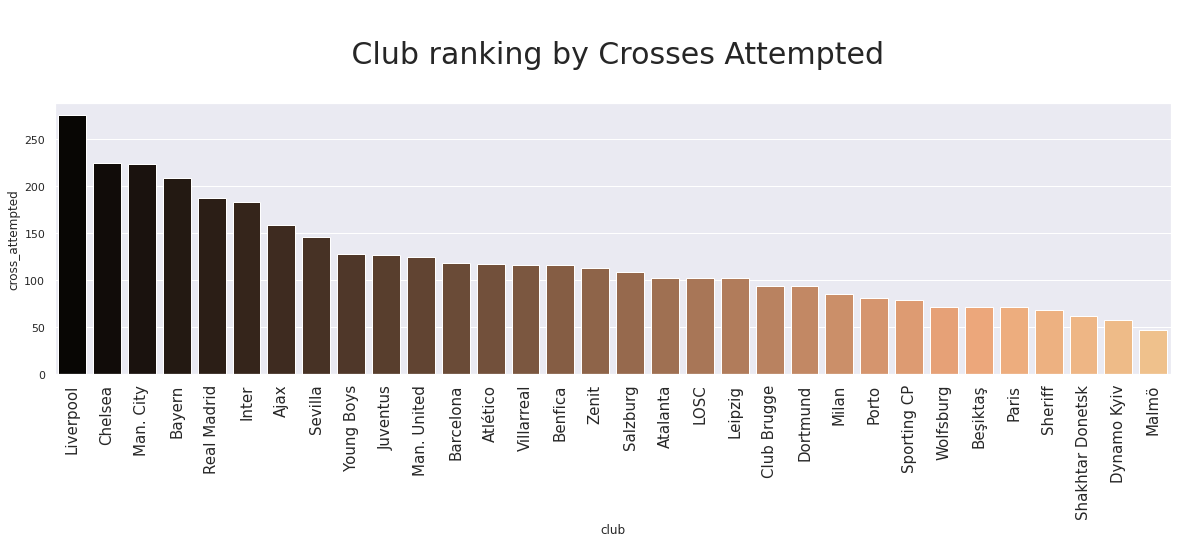

In [36]:
g1=g1.sort_values('cross_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="cross_attempted", data=g1,palette="copper",capsize=2)
p.axes.set_title("\n Club ranking by Crosses Attempted\n",fontsize=30);

### Observations: 
- Runners up Liverpool leads the list with some amazing wingers.

# 10.3. Team Ball Distribution

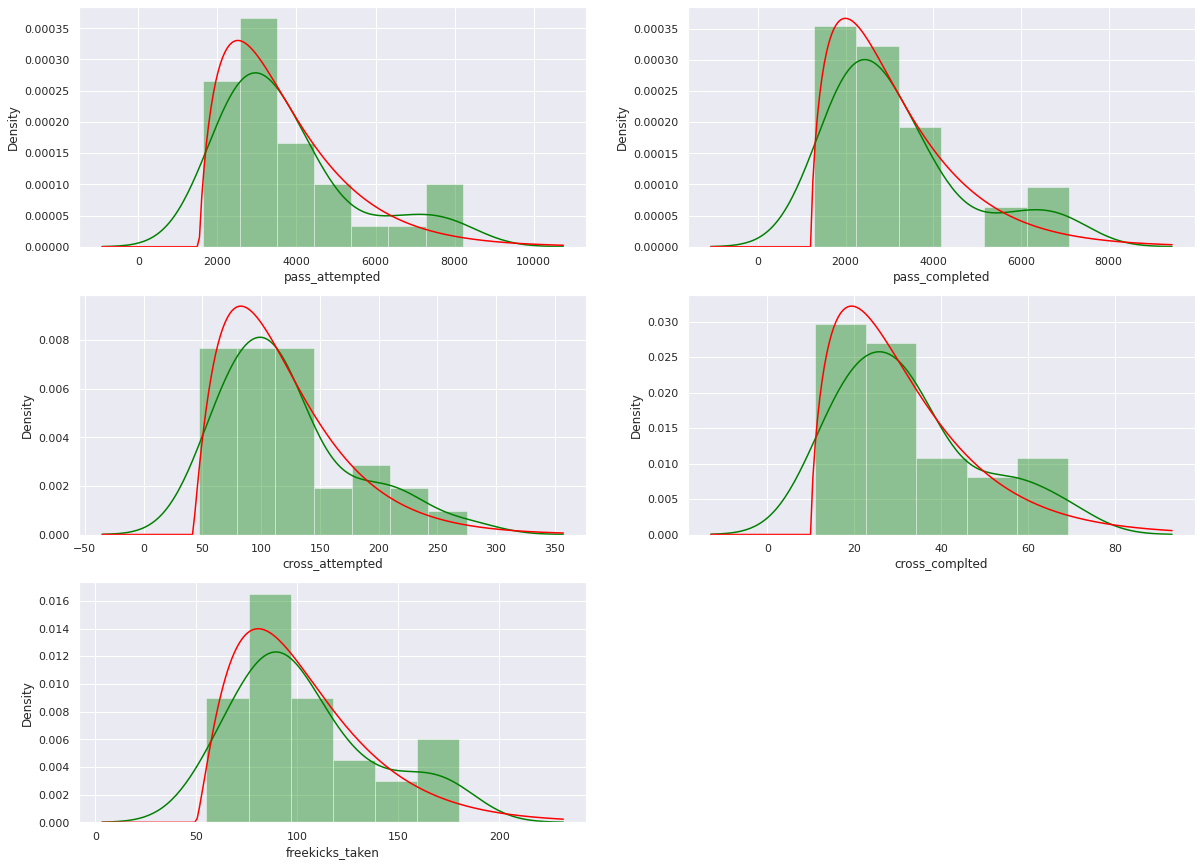

In [37]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g1[column],color='green',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Discipline Analysis</div>

# 11. Discipline Analysis


In [38]:
g2=dsp.groupby('club')["fouls_committed","fouls_suffered","red","yellow"].agg('sum').reset_index()

# 11.1. Fouls per team - Analysis

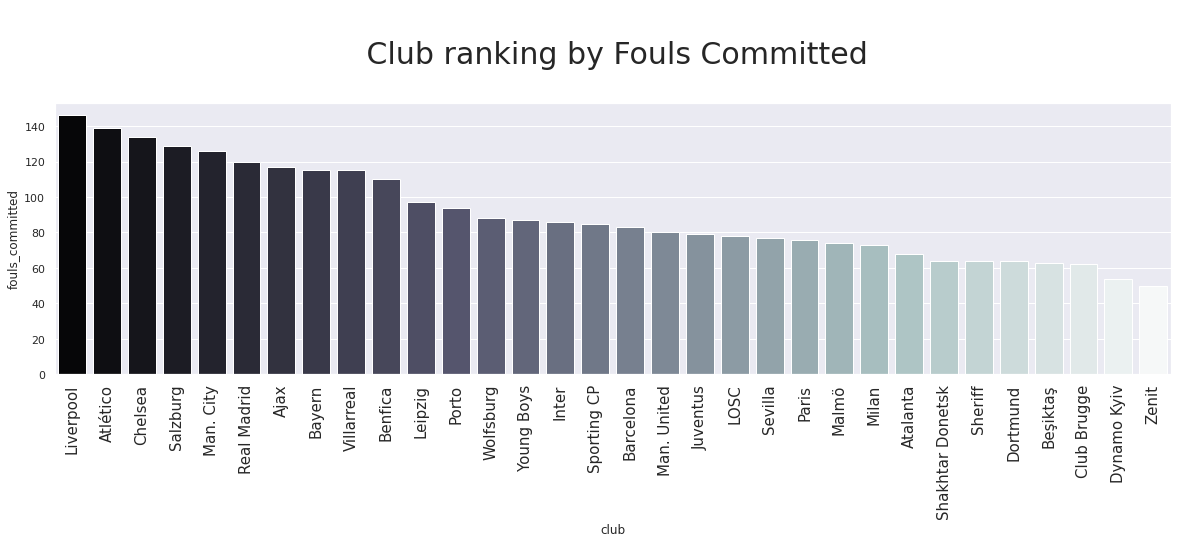

In [39]:
g2=g2.sort_values('fouls_committed',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="fouls_committed", data=g2,palette="bone",capsize=2)
p.axes.set_title("\n Club ranking by Fouls Committed\n",fontsize=30);

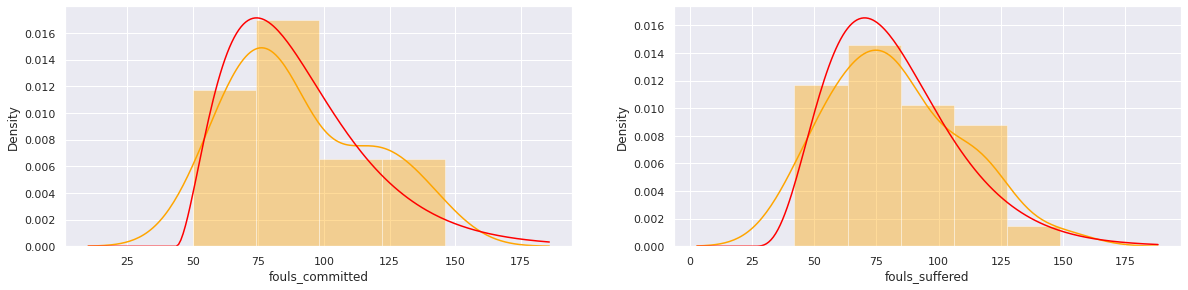

In [40]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["fouls_committed","fouls_suffered"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g2[column],color='orange',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")

# 10.2. Team Cards analysis

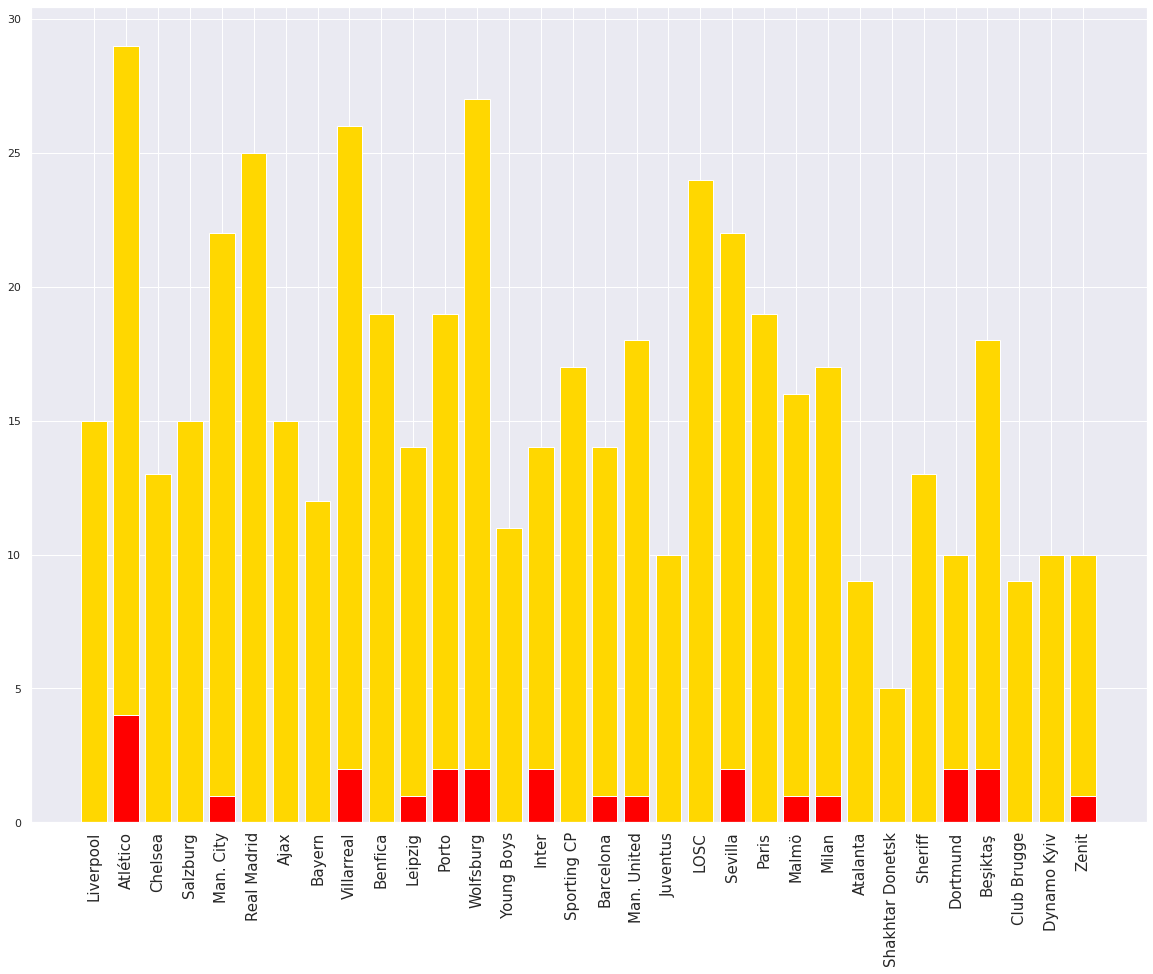

In [41]:
plt.xticks(fontsize=15,rotation='vertical')
plt.bar(g2['club'], g2["yellow"], color='red')
plt.bar(g2['club'], g2["red"], bottom=g2["yellow"], color='gold')
plt.show()

### Observations: 
- RMA is red card less affter a long time.

# 10.3. Worst disiplined players

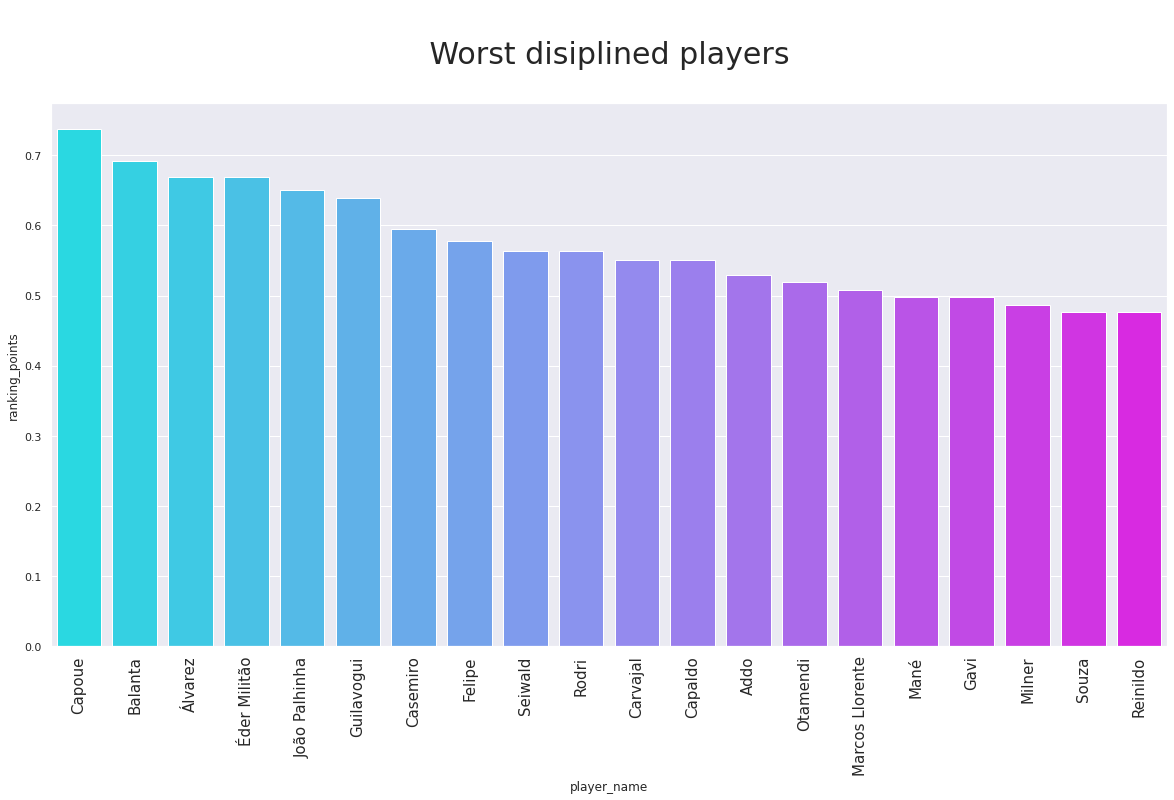

In [42]:
dsp['ranking_points']=(dsp['fouls_committed']/dsp['fouls_committed'].max())*0.5+(dsp['red']/dsp['red'].max())*0.3+(dsp['yellow']/dsp['yellow'].max())*0.2
sns.set(rc={'figure.figsize':(20,10)})
dfnx=dsp.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="cool",capsize=2)
p.axes.set_title("\n Worst disiplined players \n",fontsize=30);

<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">References</div>

# References
- [How To Build A Treemap In 3 Ways Using Python](https://www.analyticsvidhya.com/blog/2021/10/how-to-build-a-treemap-in-3-ways-using-python/)
- [UEFA](https://www.uefa.com/)
- [Export Processing Zones - EDA+Statistical Analysis](https://www.kaggle.com/code/azminetoushikwasi/export-processing-zones-eda-statistical-analysis)
- [Divorce 💥 XGBoost 📊 PCA Analysis with SHAP,TSNE](https://www.kaggle.com/code/azminetoushikwasi/divorce-xgboost-pca-analysis-with-shap-tsne)